# Modelo 1 Tabela Stress

## importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

## Leitura do CSV e informações da tabela

In [6]:
data = pd.read_csv("..\\assets\\data\\Student Stress Factors.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Sleep Quality                        520 non-null    int64
 1   suffer headaches                     520 non-null    int64
 2   academic performance                 520 non-null    int64
 3   study load                           520 non-null    int64
 4   practice extracurricular activities  520 non-null    int64
 5   stress levels                        520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [8]:
data.head()

,Sleep Quality,suffer headaches,academic performance,study load,practice extracurricular activities,stress levels
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [9]:
data.columns

Index(['Sleep Quality', 'suffer headaches', 'academic performance',
       'study load', 'practice extracurricular activities', 'stress levels'],
      dtype='object')

In [10]:
#sns.pairplot(data, hue='academic performance')

## Codigo

### New dataframe

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(data.drop('academic performance', axis=1))

StandardScaler()

In [13]:
df_normalizado = scaler.transform(data.drop('academic performance', axis=1))

In [14]:
df_normalizado

array([[-0.1138469 , -0.94899385,  0.91170283, -0.46462824,  0.09214761],
       [ 0.7969283 , -0.94899385,  0.18234057,  0.21595397, -0.64503328],
       [-1.0246221 , -0.94899385, -1.27638396,  0.89653619,  0.8293285 ],
       ...,
       [-1.0246221 ,  0.65580876, -1.27638396,  1.57711841, -0.64503328],
       [-0.1138469 ,  1.45821006,  1.64106509, -0.46462824,  1.56650939],
       [ 1.7077035 , -0.94899385,  1.64106509,  1.57711841,  0.8293285 ]])

In [15]:
df_param = pd.DataFrame(df_normalizado, columns=data.drop('academic performance', axis=1).columns)

In [16]:
df_param

,Sleep Quality,suffer headaches,study load,practice extracurricular activities,stress levels
0,-0.113847,-0.948994,0.911703,-0.464628,0.092148
1,0.796928,-0.948994,0.182341,0.215954,-0.645033
2,-1.024622,-0.948994,-1.276384,0.896536,0.829329
3,-0.113847,-0.146593,-0.547022,0.215954,0.092148
4,-1.024622,0.655809,1.641065,1.577118,0.092148
...,...,...,...,...,...
515,-0.113847,-0.146593,-0.547022,0.215954,-1.382214
516,-1.024622,1.458210,-0.547022,-1.145210,-0.645033
517,-1.024622,0.655809,-1.276384,1.577118,-0.645033
518,-0.113847,1.458210,1.641065,-0.464628,1.566509


In [17]:
df_param.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sleep Quality                        520 non-null    float64
 1   suffer headaches                     520 non-null    float64
 2   study load                           520 non-null    float64
 3   practice extracurricular activities  520 non-null    float64
 4   stress levels                        520 non-null    float64
dtypes: float64(5)
memory usage: 20.4 KB


### KNN

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_param, data['academic performance'], test_size=0.25, random_state=1)

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred = knn.predict(X_test)

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



In [23]:
print(confusion_matrix(y_test,pred))

[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


In [24]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

In [25]:
error_rate

[0.023076923076923078,
 0.023076923076923078,
 0.023076923076923078,
 0.046153846153846156,
 0.14615384615384616,
 0.2846153846153846,
 0.3384615384615385,
 0.35384615384615387,
 0.36153846153846153,
 0.3230769230769231,
 0.2846153846153846,
 0.2923076923076923,
 0.36923076923076925,
 0.36153846153846153,
 0.38461538461538464,
 0.4076923076923077,
 0.4307692307692308,
 0.4307692307692308,
 0.4230769230769231,
 0.4461538461538462,
 0.45384615384615384,
 0.43846153846153846,
 0.5076923076923077,
 0.5384615384615384,
 0.5538461538461539,
 0.5692307692307692,
 0.5846153846153846,
 0.5615384615384615,
 0.5769230769230769,
 0.5384615384615384,
 0.6,
 0.6230769230769231,
 0.6153846153846154,
 0.6076923076923076,
 0.6307692307692307,
 0.6,
 0.5846153846153846,
 0.5923076923076923,
 0.5846153846153846]

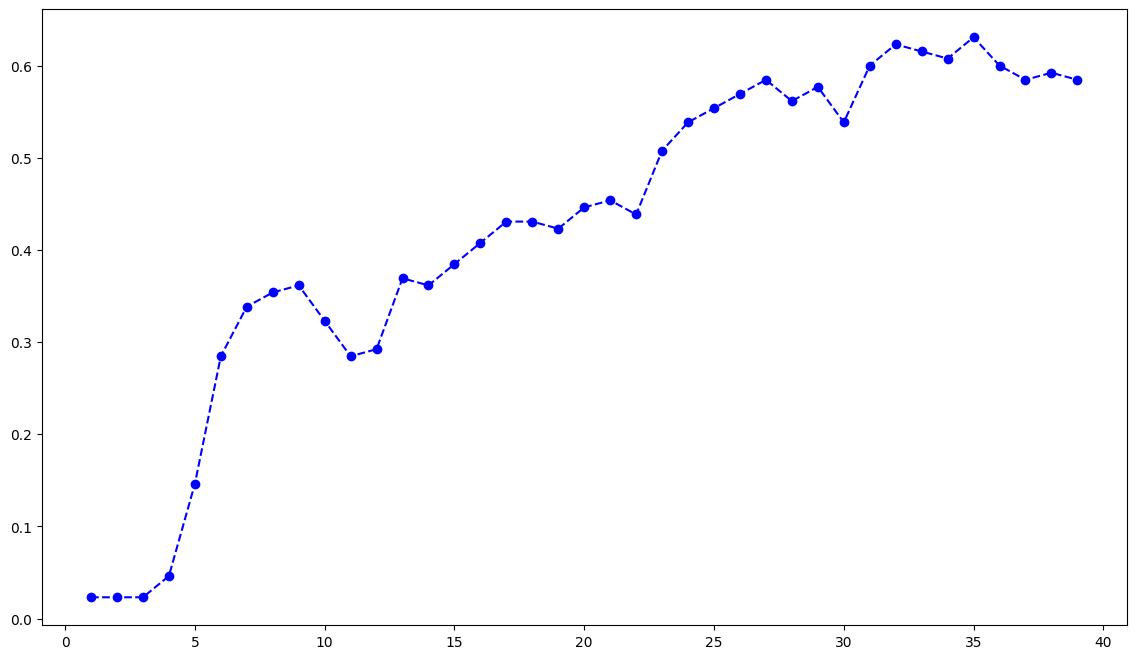

In [26]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [28]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


### Grafico

# Modelo 1 Tabela Performace

## Leitura do CSV e importações

In [334]:
data2 = pd.read_csv("..\\assets\\data\\performance_data_Index_convertido_por_faixas.csv")

In [335]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [336]:
data2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,5
1,4,82,0,4,2,4
2,8,51,1,7,2,3
3,5,52,1,5,2,2
4,7,75,0,8,5,4


In [337]:
data2.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

## Codigo

### New DataFrame

In [338]:
scaler2 = StandardScaler()
scaler2.fit(data2.drop('Performance Index', axis=1))

StandardScaler()

In [339]:
df2_normalizado = scaler2.transform(data2.drop('Performance Index', axis=1))

In [340]:
df2_normalizado

array([[ 0.77518771,  1.70417565,  1.01045465,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -0.98965352, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  1.01045465,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  1.01045465,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  1.01045465,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245, -0.98965352,  0.86650484, -1.24975394]])

In [341]:
df2_param = pd.DataFrame(df2_normalizado, columns=data2.drop('Performance Index', axis=1).columns)

In [342]:
df2_param.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333


In [343]:
df2_param.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  float64
 1   Previous Scores                   10000 non-null  float64
 2   Extracurricular Activities        10000 non-null  float64
 3   Sleep Hours                       10000 non-null  float64
 4   Sample Question Papers Practiced  10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


### KNN

In [344]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2_param, data2['Performance Index'], test_size=0.30, random_state= 20)

In [345]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X2_train, y2_train)
pred2 = knn2.predict(X2_test)

In [346]:
knn2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [347]:
print(classification_report(y2_test,pred2))
print('\n')
print(confusion_matrix(y2_test,pred2))

              precision    recall  f1-score   support

           1       0.65      0.65      0.65        72
           2       0.84      0.83      0.84       702
           3       0.84      0.83      0.84      1023
           4       0.84      0.85      0.85       881
           5       0.82      0.82      0.82       322

    accuracy                           0.83      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.83      0.83      0.83      3000



[[ 47  25   0   0   0]
 [ 25 586  91   0   0]
 [  0  87 851  85   0]
 [  0   0  71 753  57]
 [  0   0   0  57 265]]


In [348]:
error_rate2 = []

for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train, y2_train)
    pred2 = knn2.predict(X2_test)
    error_rate2.append(np.mean(pred2!=y2_test))

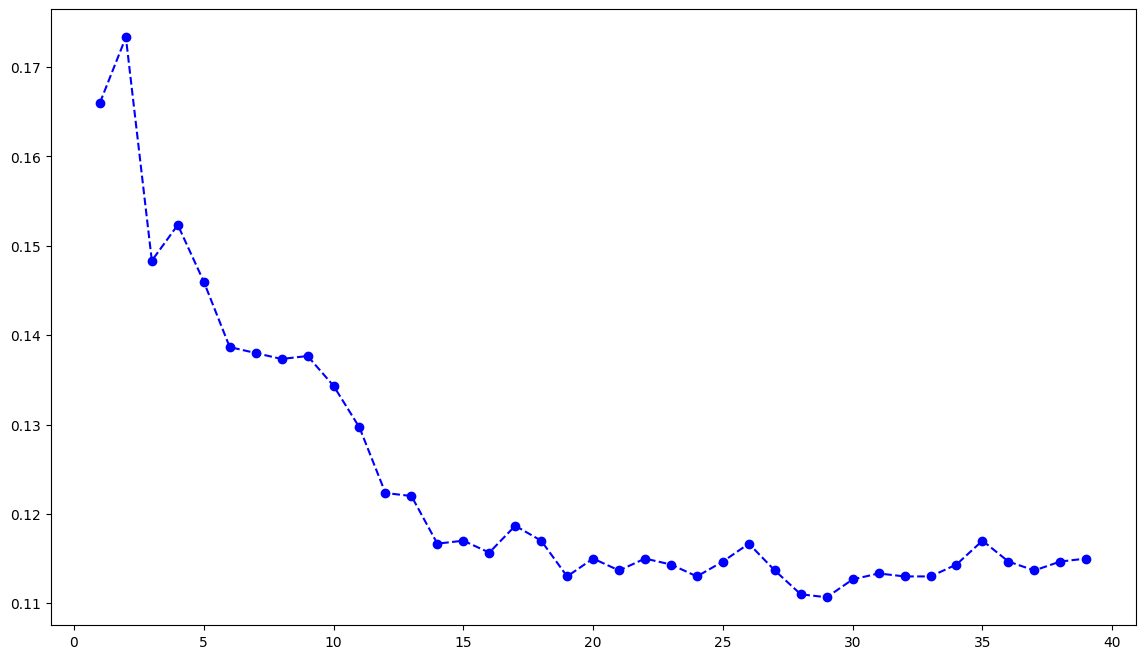

In [349]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate2, color='blue', linestyle='dashed', marker='o')

In [350]:
knn2 = KNeighborsClassifier(n_neighbors=29)
knn2.fit(X2_train, y2_train)
pred2 = knn2.predict(X2_test)

In [351]:
print(classification_report(y2_test,pred2))
print('\n')
print(confusion_matrix(y2_test,pred2))

              precision    recall  f1-score   support

           1       1.00      0.17      0.29        72
           2       0.87      0.90      0.89       702
           3       0.89      0.92      0.91      1023
           4       0.88      0.93      0.91       881
           5       0.94      0.80      0.87       322

    accuracy                           0.89      3000
   macro avg       0.92      0.74      0.77      3000
weighted avg       0.89      0.89      0.88      3000



[[ 12  60   0   0   0]
 [  0 634  68   0   0]
 [  0  34 943  46   0]
 [  0   0  44 822  15]
 [  0   0   0  65 257]]


## Sem Conversão

### Leitura

In [168]:
semConv = pd.read_csv("..\\assets\\data\\performance_data_Index_convertido_por_faixas.csv")

In [170]:
semConv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Extracurricular Activities        10000 non-null  int64
 2   Sleep Hours                       10000 non-null  int64
 3   Sample Question Papers Practiced  10000 non-null  int64
 4   Performance Index                 10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


### New DataFrame

In [171]:
scaler3 = StandardScaler()
scaler3.fit(semConv.drop('Performance Index', axis=1))

StandardScaler()

In [172]:
df3_normalizado = scaler3.transform(semConv.drop('Performance Index', axis=1))

In [173]:
df3_normalizado

array([[ 0.77518771,  1.01045465,  1.45620461, -1.24975394],
       [-0.38348058, -0.98965352, -1.49229423, -0.90098215],
       [ 1.16141048,  1.01045465,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  1.01045465,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.01045465,  0.27680507, -1.59852572],
       [ 0.77518771, -0.98965352,  0.86650484, -1.24975394]])

In [174]:
df3_param = pd.DataFrame(df3_normalizado, columns=semConv.drop('Performance Index', axis=1).columns)

In [175]:
df3_param.head()

,Hours Studied,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.010455,1.456205,-1.249754
1,-0.383481,-0.989654,-1.492294,-0.900982
2,1.161410,1.010455,0.276805,-0.900982
3,0.002742,1.010455,-0.902594,-0.900982
4,0.775188,-0.989654,0.866505,0.145333


In [176]:
df3_param.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  float64
 1   Extracurricular Activities        10000 non-null  float64
 2   Sleep Hours                       10000 non-null  float64
 3   Sample Question Papers Practiced  10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


### KNN

In [178]:
X3_train, X3_test, y3_train, y3_test = train_test_split(df3_param, semConv['Performance Index'], test_size=0.30)

In [179]:
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X3_train, y3_train)
pred3 = knn3.predict(X3_test)

In [139]:
knn3.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [180]:
print(classification_report(y3_test,pred3))
print('\n')
print(confusion_matrix(y3_test,pred3))

              precision    recall  f1-score   support

           1       0.11      0.13      0.12        86
           2       0.25      0.25      0.25       669
           3       0.34      0.34      0.34      1027
           4       0.32      0.29      0.30       929
           5       0.22      0.28      0.24       289

    accuracy                           0.29      3000
   macro avg       0.25      0.26      0.25      3000
weighted avg       0.30      0.29      0.29      3000



[[ 11  23  32  20   0]
 [ 30 170 233 189  47]
 [ 33 234 351 280 129]
 [ 22 203 328 267 109]
 [  0  46  94  69  80]]


In [181]:
error_rate3 = []

for i in range(1,40):
    knn3 = KNeighborsClassifier(n_neighbors=i)
    knn3.fit(X3_train, y3_train)
    pred3 = knn3.predict(X3_test)
    error_rate3.append(np.mean(pred3!=y3_test))

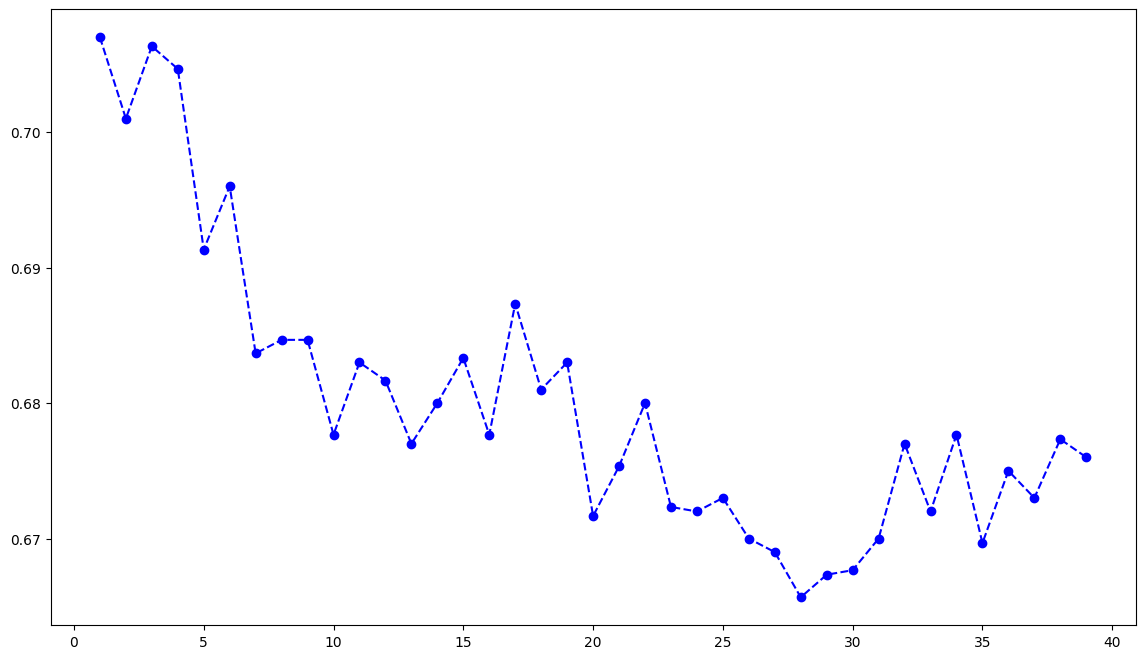

In [182]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate3, color='blue', linestyle='dashed', marker='o')

In [183]:
knn3 = KNeighborsClassifier(n_neighbors=28)
knn3.fit(X3_train, y3_train)
pred3 = knn3.predict(X3_test)

In [184]:
print(classification_report(y3_test,pred3))
print('\n')
print(confusion_matrix(y3_test,pred3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        86
           2       0.28      0.32      0.30       669
           3       0.36      0.46      0.41      1027
           4       0.35      0.31      0.33       929
           5       0.24      0.08      0.12       289

    accuracy                           0.33      3000
   macro avg       0.25      0.24      0.23      3000
weighted avg       0.32      0.33      0.32      3000



[[  0  51  29   6   0]
 [  0 214 272 172  11]
 [  0 242 475 270  40]
 [  0 225 388 290  26]
 [  0  26 142  97  24]]


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati